In [60]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np   

In [61]:
df = pd.read_csv("data (2).csv") # read_csv: inbuilt function of pandas to read files 
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [62]:
print(df.shape) #returns a tuple with the details number of rows and columns 

(100000, 24)


In [63]:
print(df.columns) # returns array of columns in dataset 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')


In [64]:
df.info()       # returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [65]:
df.isnull().sum()       # isnull returns the True/False dataframe
                            #sum: counts the number of True in columns

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [66]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


# Data Cleaning

In [67]:
# Checking outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR= Q3 - Q1
    lower_fence= Q1 - 1.5*IQR
    upper_fence= Q3 + 1.5*IQR
    ls = df.index[(df[ft]<lower_fence)|(df[ft]>upper_fence)]
    return ls

In [68]:
index_list=[]
for x in ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','CNT_CHILDREN']:
    index_list.extend(outliers(df,x))

In [69]:
index_list

[7,
 22,
 33,
 49,
 51,
 58,
 59,
 84,
 121,
 142,
 280,
 288,
 316,
 319,
 323,
 328,
 332,
 341,
 357,
 366,
 367,
 391,
 405,
 409,
 410,
 411,
 416,
 426,
 429,
 441,
 485,
 506,
 537,
 609,
 622,
 632,
 675,
 688,
 701,
 737,
 759,
 765,
 775,
 796,
 834,
 871,
 888,
 930,
 963,
 964,
 1046,
 1049,
 1057,
 1060,
 1064,
 1092,
 1146,
 1209,
 1238,
 1306,
 1316,
 1324,
 1334,
 1404,
 1408,
 1446,
 1450,
 1467,
 1480,
 1504,
 1527,
 1545,
 1566,
 1568,
 1584,
 1586,
 1625,
 1644,
 1647,
 1649,
 1662,
 1674,
 1677,
 1692,
 1723,
 1744,
 1786,
 1793,
 1797,
 1808,
 1823,
 1831,
 1877,
 1879,
 1894,
 1939,
 1942,
 1959,
 1975,
 2009,
 2023,
 2087,
 2088,
 2099,
 2156,
 2181,
 2207,
 2229,
 2240,
 2253,
 2285,
 2287,
 2290,
 2378,
 2383,
 2396,
 2418,
 2422,
 2430,
 2458,
 2481,
 2486,
 2640,
 2642,
 2643,
 2650,
 2663,
 2695,
 2714,
 2715,
 2770,
 2793,
 2814,
 2822,
 2833,
 2843,
 2852,
 2885,
 2887,
 2922,
 2962,
 2972,
 2976,
 3069,
 3098,
 3111,
 3140,
 3173,
 3175,
 3199,
 3209,
 3

In [70]:
# remove outliers
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [71]:
df_new=remove(df,index_list)

In [72]:
# Number of rows and columns after removing outliers
df_new.shape

(90306, 24)

In [73]:
df_new.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
count,90306.000000,90306.000000,90306.000000,90306.000000,9.030600e+04,9.023000e+04,90306.00000,90306.000000,90306.000000,90306.000000,90306.000000,90306.000000,90306.000000,90306.000000
mean,158017.137377,0.083284,0.375789,151636.017281,5.352300e+05,4.777282e+05,66325.98958,0.999989,0.813113,0.198226,0.998118,0.053175,2.104079,0.925188
std,33476.153542,0.276312,0.638548,62907.495351,3.200693e+05,2.870952e+05,143296.17530,0.003328,0.389823,0.398666,0.043347,0.224383,0.840564,0.339500
min,100002.000000,0.000000,0.000000,25650.000000,4.500000e+04,4.500000e+04,-17531.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129081.250000,0.000000,0.000000,112500.000000,2.695500e+05,2.250000e+05,-2687.00000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,157906.500000,0.000000,0.000000,135000.000000,4.814955e+05,4.500000e+05,-1173.00000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,186981.750000,0.000000,1.000000,180000.000000,7.551900e+05,6.750000e+05,-260.00000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
max,216090.000000,1.000000,2.000000,337500.000000,1.609272e+06,1.341000e+06,365243.00000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


C:\Users\AdityaKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


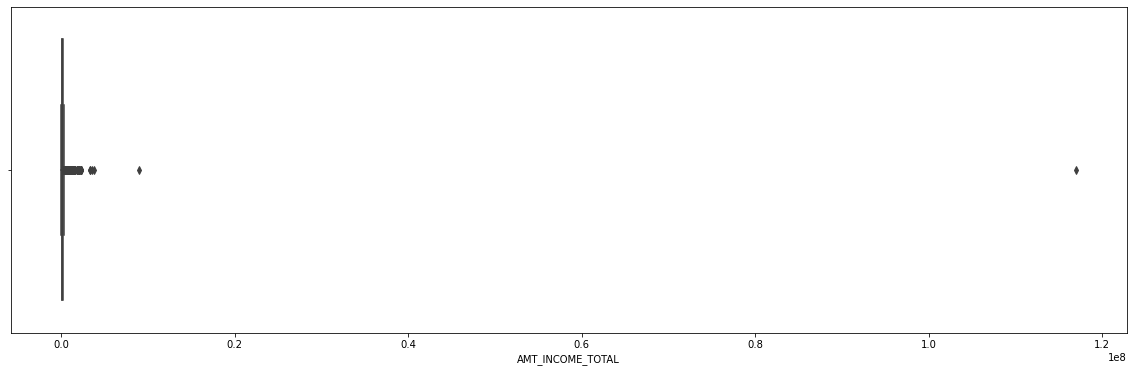

In [74]:
# original dataframe has been taken inorder to show the outliers value
plt.figure(figsize=(20,6))
sns.boxplot(df['AMT_INCOME_TOTAL'])
plt.show()

C:\Users\AdityaKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


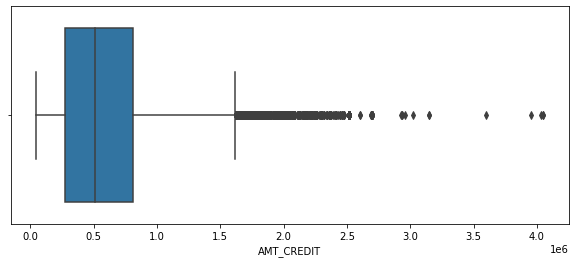

In [75]:
plt.figure(figsize=(10,4))
sns.boxplot(df['AMT_CREDIT'])
plt.show()

C:\Users\AdityaKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


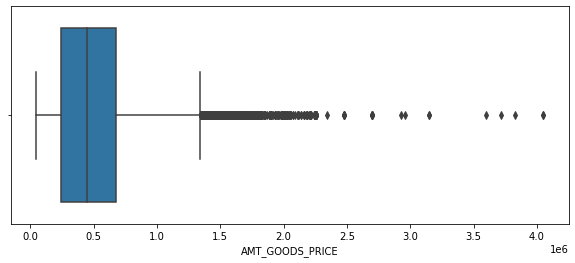

In [76]:
plt.figure(figsize=(10,4))
sns.boxplot(df['AMT_GOODS_PRICE'])
plt.show()

In [77]:
df.dropna(subset=["AMT_GOODS_PRICE"], inplace=True)
df["NAME_TYPE_SUITE"].fillna(df.NAME_TYPE_SUITE.mode()[0], inplace=True)
df["OCCUPATION_TYPE"].fillna("Not Available", inplace=True)
df.dropna(subset=["CNT_FAM_MEMBERS"], inplace=True)
print(df["NAME_TYPE_SUITE"].value_counts())
print(df["OCCUPATION_TYPE"].value_counts())

df.head()

Unaccompanied      81113
Family             13102
Spouse, partner     3704
Children            1072
Other_B              556
Other_A              287
Group of people       85
Name: NAME_TYPE_SUITE, dtype: int64
Not Available            31209
Laborers                 17959
Sales staff              10376
Core staff                8936
Managers                  6959
Drivers                   6053
High skill tech staff     3649
Accountants               3256
Medicine staff            2849
Security staff            2198
Cooking staff             1953
Cleaning staff            1512
Private service staff      862
Low-skill Laborers         705
Waiters/barmen staff       436
Secretaries                415
Realty agents              242
HR staff                   181
IT staff                   169
Name: OCCUPATION_TYPE, dtype: int64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [78]:
df.isnull().sum() 

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

In [79]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
count,99919.000000,99919.000000,99919.000000,9.991900e+04,9.991900e+04,9.991900e+04,99919.000000,99919.000000,99919.000000,99919.000000,99919.000000,99919.000000,99919.000000,99919.000000
mean,158005.742451,0.080916,0.417318,1.694561e+05,5.992476e+05,5.383451e+05,63319.456230,0.999990,0.821205,0.199301,0.997988,0.056176,2.155596,0.931214
std,33482.484911,0.272707,0.720911,3.836491e+05,4.020740e+05,3.693977e+05,140862.873977,0.003164,0.383182,0.399477,0.044806,0.230261,0.908877,0.343947
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,4.500000e+04,-17531.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129073.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,-2758.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,157874.000000,0.000000,0.000000,1.440000e+05,5.135310e+05,4.500000e+05,-1218.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,186983.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,-291.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
max,216090.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,4.050000e+06,365243.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,4.000000


# Univariate Analysis

### User defined functions for level 1 analysis of categorical columns
This function will check for the following:
Unique values 
Mode 
Sum of all the null values 
Total count of missing values 

In [80]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")
    

# Target variable analysis

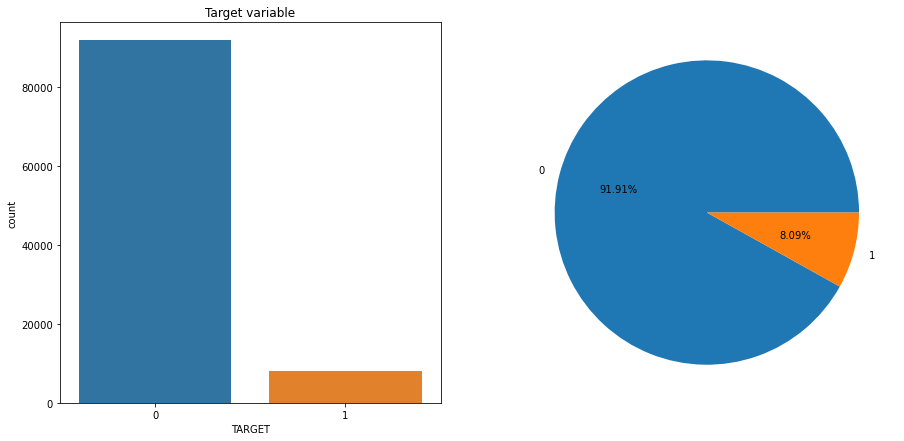

In [81]:

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Target variable")                  # Set the title of the graph
percentage = df["TARGET"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["TARGET"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["TARGET"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Percentage of previously approaved loan applicants that had difficulties to make payment are : 8.09 

# Loan Type analysis

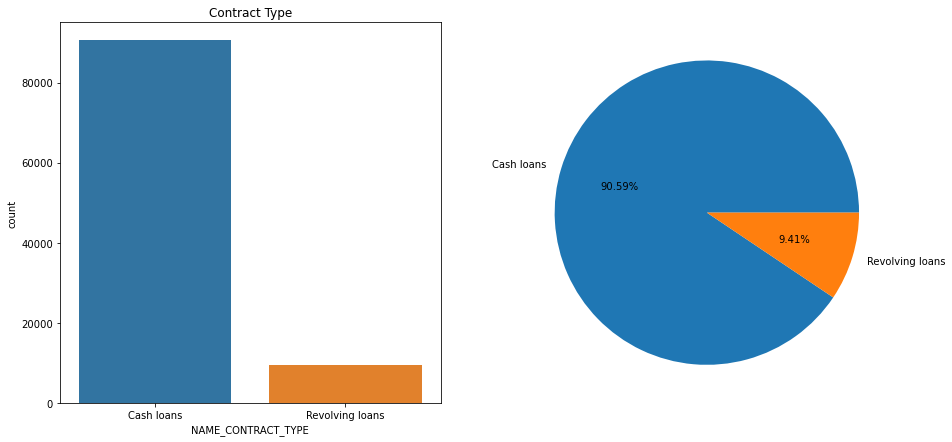

In [82]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Contract Type")                  # Set the title of the graph
percentage = df["NAME_CONTRACT_TYPE"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["NAME_CONTRACT_TYPE"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["NAME_CONTRACT_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Analysis of Gender of customers

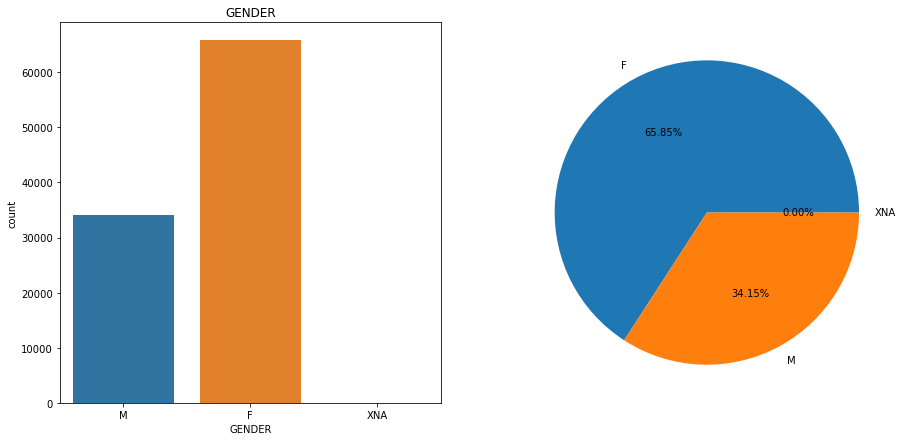

In [83]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("GENDER")                  # Set the title of the graph
percentage = df["GENDER"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["GENDER"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["GENDER"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Analysis of cars owned by customers

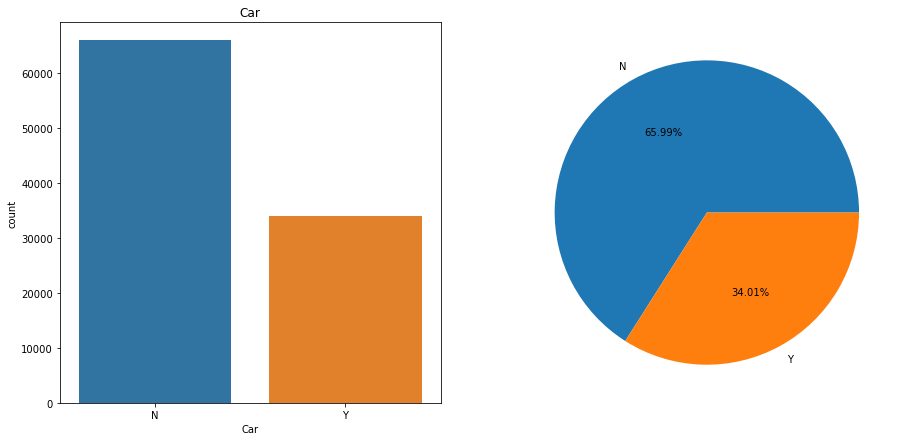

In [84]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Car")                  # Set the title of the graph
percentage = df["Car"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Car"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Car"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Analysis of Housing

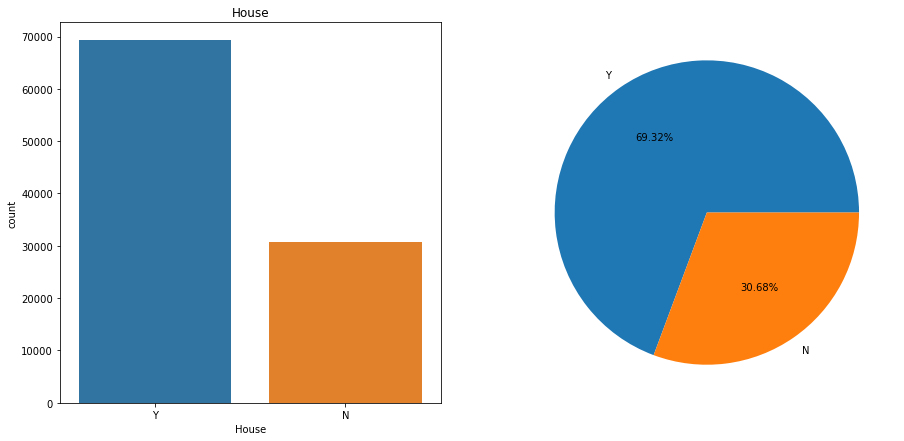

In [85]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("House")                  # Set the title of the graph
percentage = df["House"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["House"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["House"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Analysis of children of customers

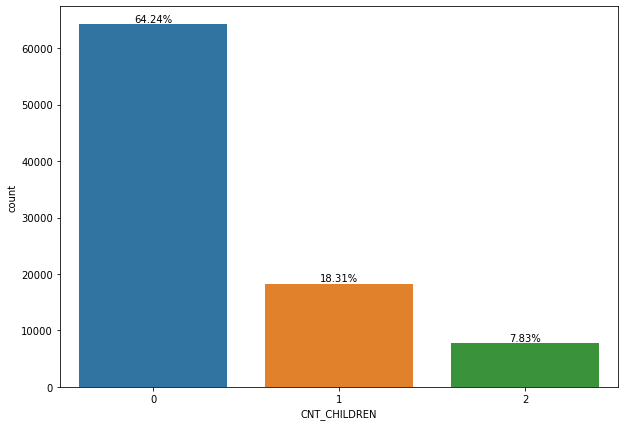

In [86]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df_new["CNT_CHILDREN"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df)*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

# Analysis of Person who was accompanying the client

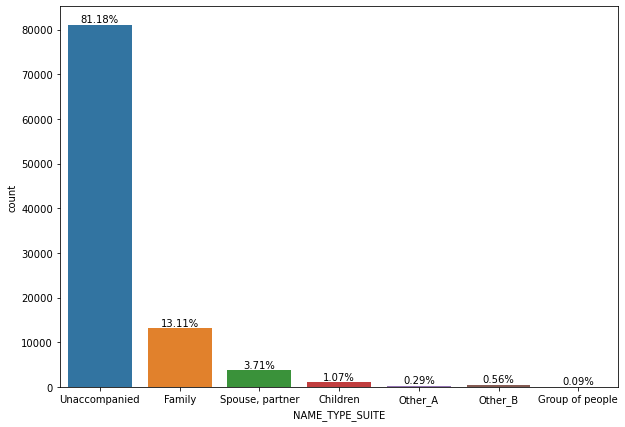

In [87]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["NAME_TYPE_SUITE"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df)*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

# Analysis of clients income type

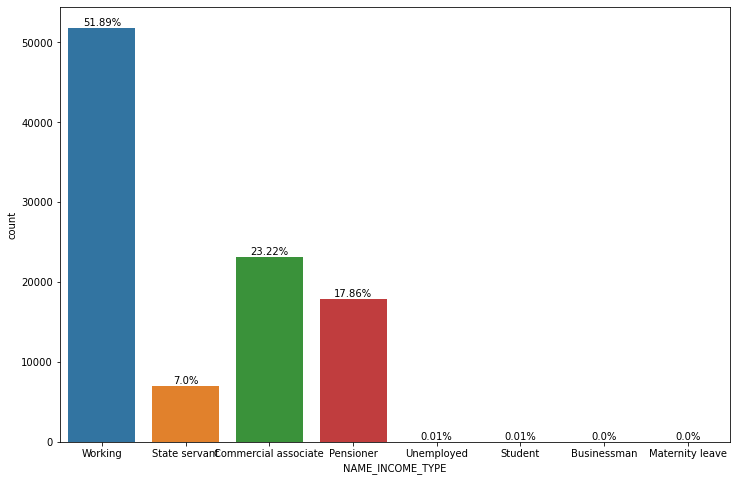

In [88]:
fig, ax = plt.subplots(figsize= (12, 8))
ax = sns.countplot(x = df["NAME_INCOME_TYPE"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df)*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

# Analysis of Education type of customers

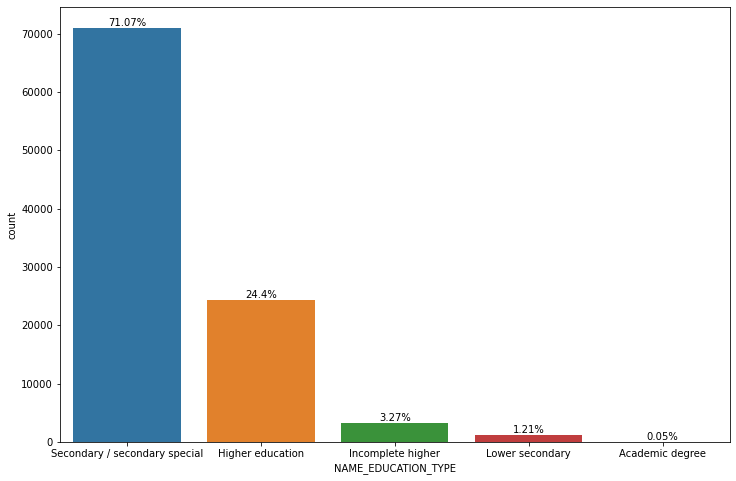

In [89]:
fig, ax = plt.subplots(figsize= (12, 8))
ax = sns.countplot(x = df["NAME_EDUCATION_TYPE"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df)*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

# Analysis of Family Status

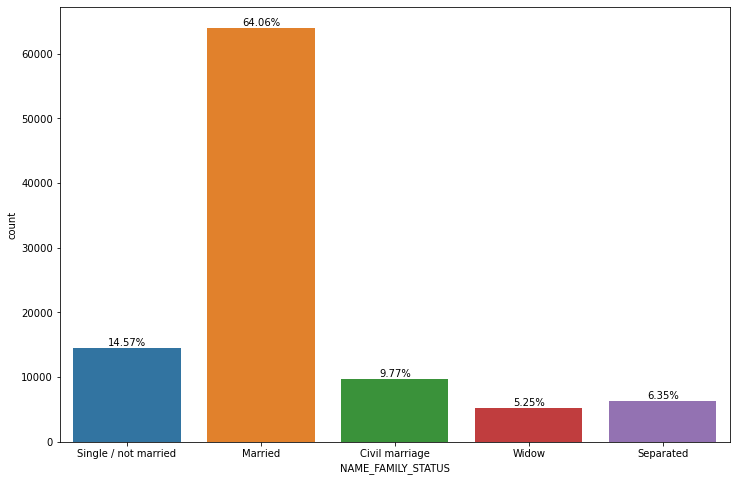

In [90]:
fig, ax = plt.subplots(figsize= (12, 8))
ax = sns.countplot(x = df["NAME_FAMILY_STATUS"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df)*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

# Analysis of Mobile Phone of clients

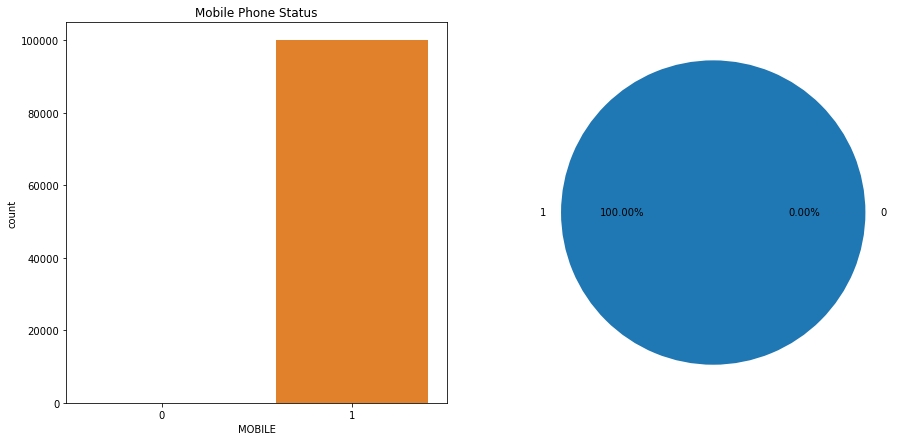

In [91]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Mobile Phone Status")                  # Set the title of the graph
percentage = df["MOBILE"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["MOBILE"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["MOBILE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Analysis of Work Phone of clients

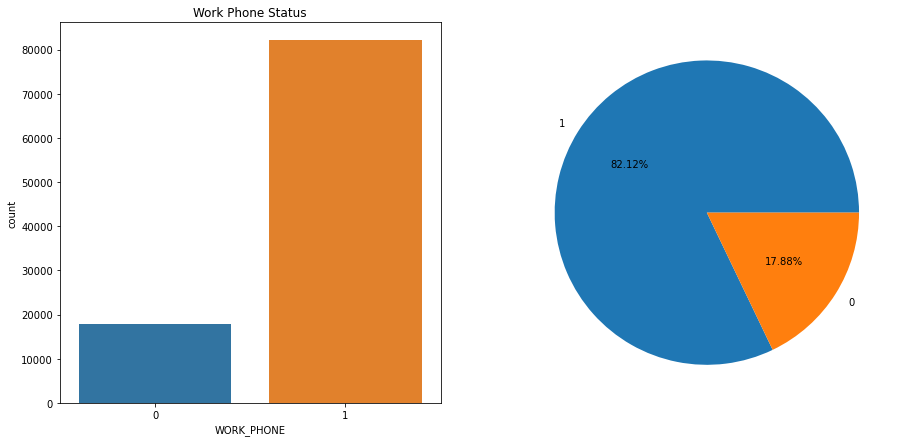

In [92]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Work Phone Status")                  # Set the title of the graph
percentage = df["WORK_PHONE"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["WORK_PHONE"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["WORK_PHONE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Analysis of Home Phone of clients

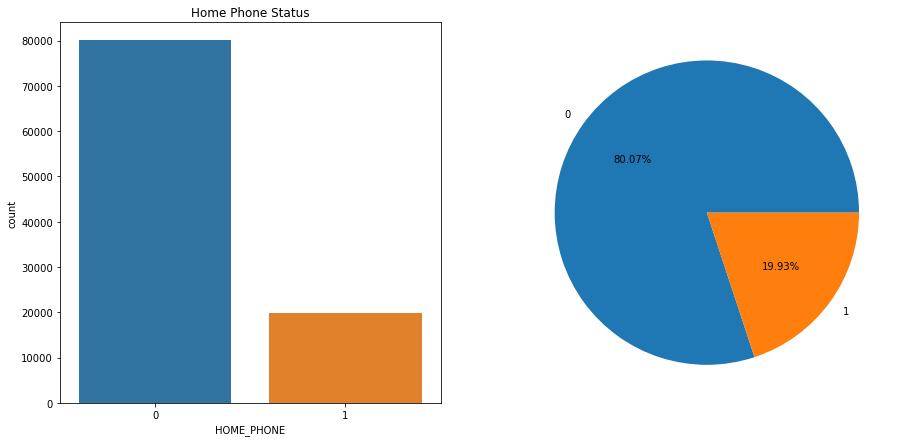

In [93]:

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Home Phone Status")                  # Set the title of the graph
percentage = df["HOME_PHONE"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["HOME_PHONE"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["HOME_PHONE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Analysis of Mobile Phone of clients if it was rechable or not

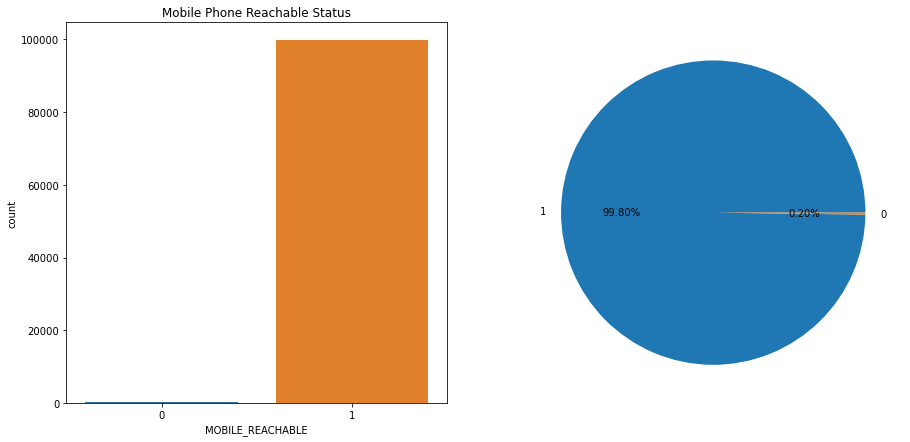

In [94]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Mobile Phone Reachable Status")                  # Set the title of the graph
percentage = df["MOBILE_REACHABLE"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["MOBILE_REACHABLE"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["MOBILE_REACHABLE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Analysis of Email of clients

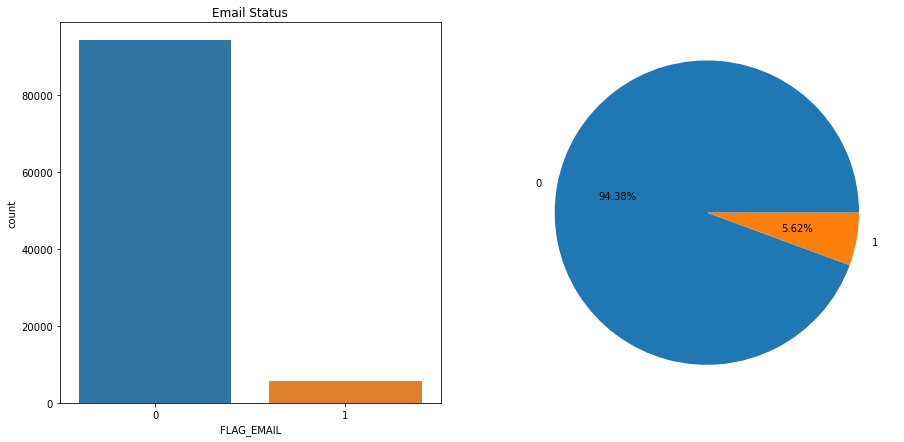

In [95]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Email Status")                  # Set the title of the graph
percentage = df["FLAG_EMAIL"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["FLAG_EMAIL"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["FLAG_EMAIL"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Analysis of occupation type of clients

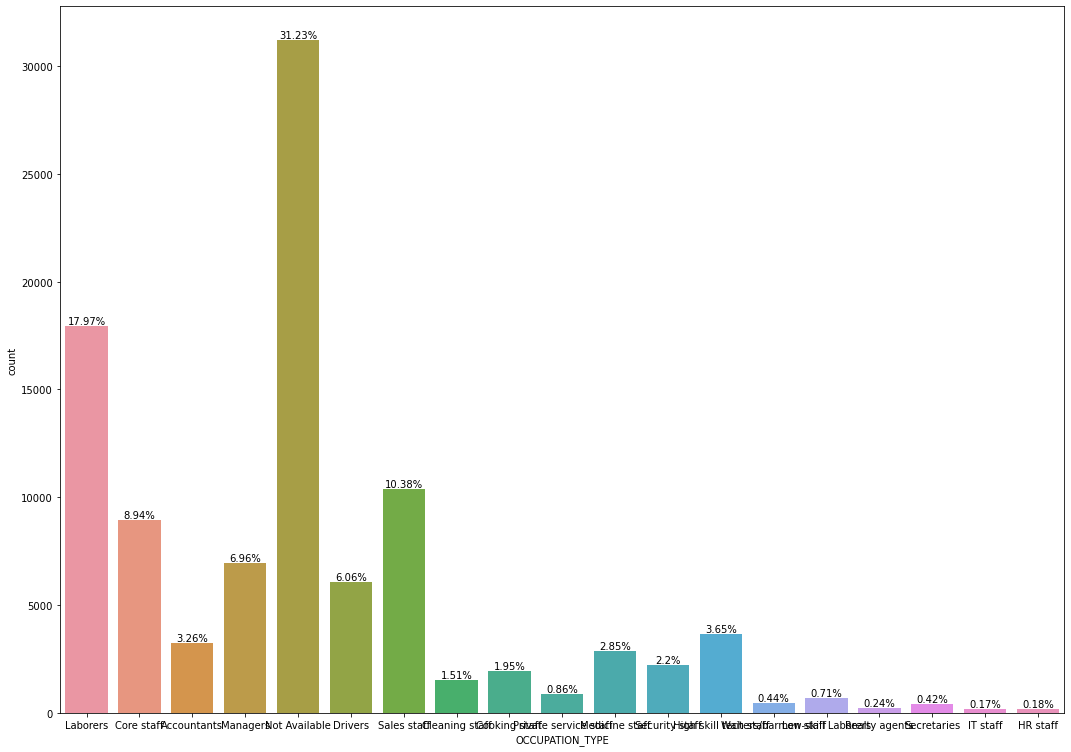

In [96]:
fig, ax = plt.subplots(figsize= (18, 13))
ax = sns.countplot(x = df["OCCUPATION_TYPE"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df)*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

# Analysis of family members of clients

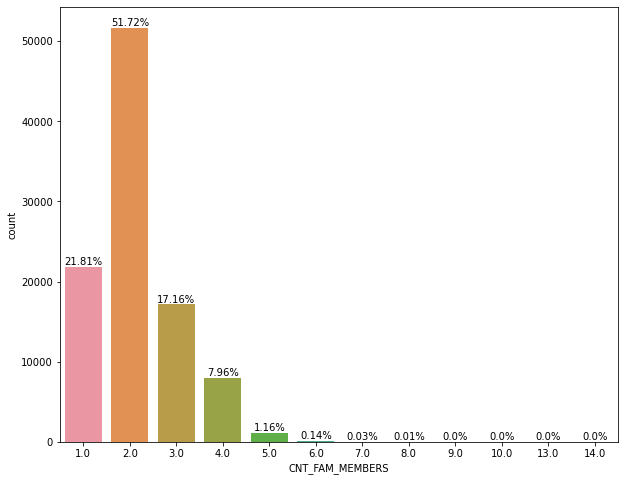

In [97]:
fig, ax = plt.subplots(figsize= (10, 8))
ax = sns.countplot(x = df["CNT_FAM_MEMBERS"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(df)*100, 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

# Analysis of Day of Application

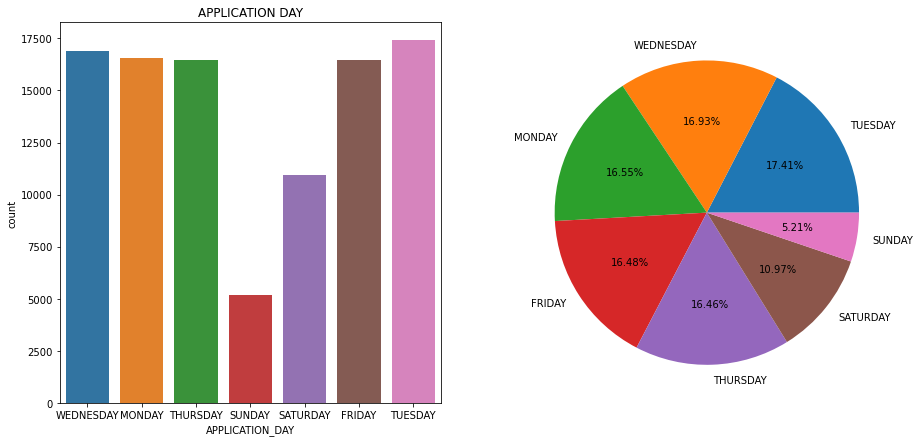

In [98]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("APPLICATION DAY")                  # Set the title of the graph
percentage = df["APPLICATION_DAY"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["APPLICATION_DAY"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["APPLICATION_DAY"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Analysis of Total number of Documents submitted

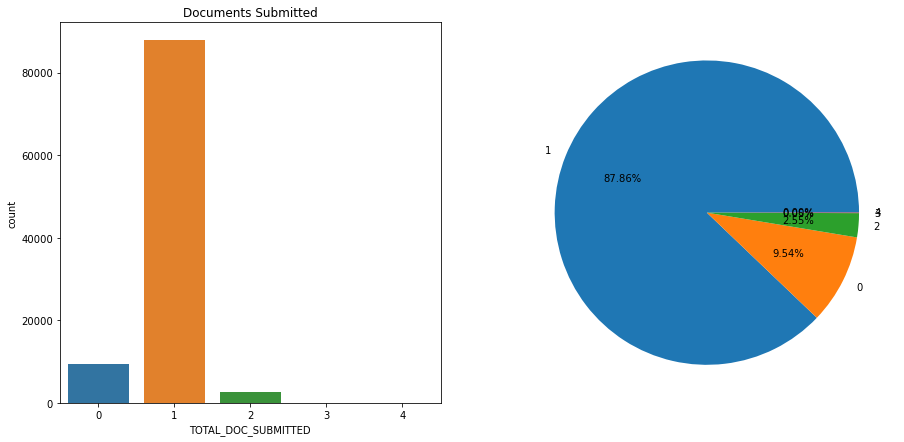

In [99]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Documents Submitted")                  # Set the title of the graph
percentage = df["TOTAL_DOC_SUBMITTED"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["TOTAL_DOC_SUBMITTED"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["TOTAL_DOC_SUBMITTED"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# Univariate Analysis of Numerical Variables

# User defined function for calculating mean, median, mode,  standard deviation, and count of all null values 

In [100]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

# Analysis of Income of client

In [101]:
info_of_numerical("AMT_INCOME_TOTAL")

The mean of the AMT_INCOME_TOTAL is 169456.10822090894
The median of the AMT_INCOME_TOTAL is 144000.0
The mode of the AMT_INCOME_TOTAL is 135000.0
The standard deviation of the AMT_INCOME_TOTAL is 383649.086873658
Number of missing values in the AMT_INCOME_TOTAL is 0


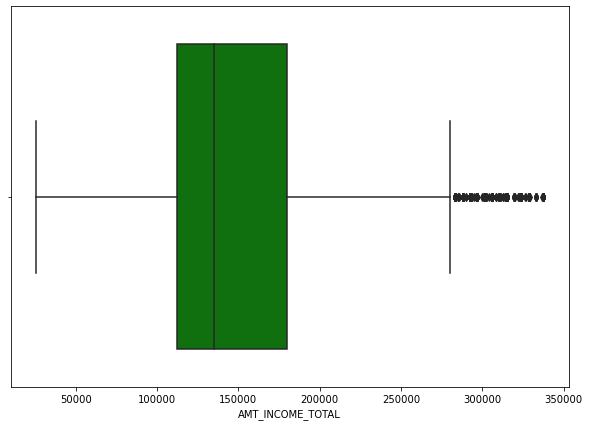

In [102]:
# Distribution of Income of Client
fig, ax = plt.subplots(1, figsize= (10, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.boxplot(x = df_new["AMT_INCOME_TOTAL"], color = "g") # ax[0] means image will plot at the second space
plt.show()

# Analysis of Credit Amount

In [103]:
info_of_numerical("AMT_CREDIT")

The mean of the AMT_CREDIT is 599247.6370860396
The median of the AMT_CREDIT is 513531.0
The mode of the AMT_CREDIT is 450000.0
The standard deviation of the AMT_CREDIT is 402074.0441800855
Number of missing values in the AMT_CREDIT is 0


C:\Users\AdityaKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


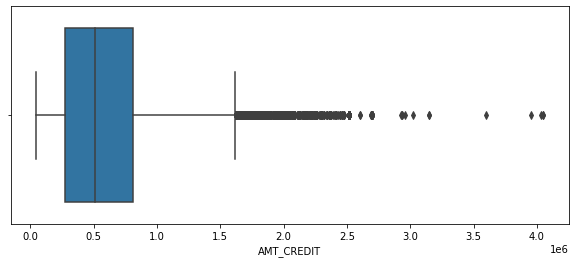

In [104]:
# Distribution of Credit amount of Client
plt.figure(figsize=(10,4))
sns.boxplot(df['AMT_CREDIT'])
plt.show()

# Analysis of Goods price

In [105]:
info_of_numerical("AMT_GOODS_PRICE")

The mean of the AMT_GOODS_PRICE is 538345.1489706662
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 450000.0
The standard deviation of the AMT_GOODS_PRICE is 369397.7246421765
Number of missing values in the AMT_GOODS_PRICE is 0


C:\Users\AdityaKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


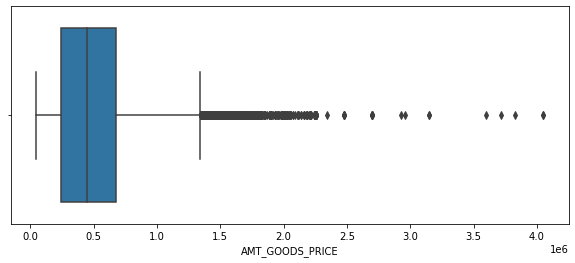

In [106]:
# Distribution of Credit amount of Client
plt.figure(figsize=(10,4))
sns.boxplot(df['AMT_GOODS_PRICE'])
plt.show()

# CAT-CAT ANALYSIS  (relationship between categorical data)

# Relationship between Target and Gender

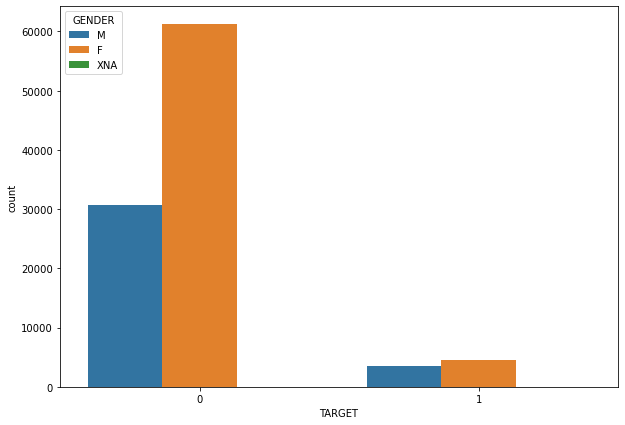

In [107]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "TARGET", hue = "GENDER", data = df)
plt.show()

# Relationship between Target and Contract Types

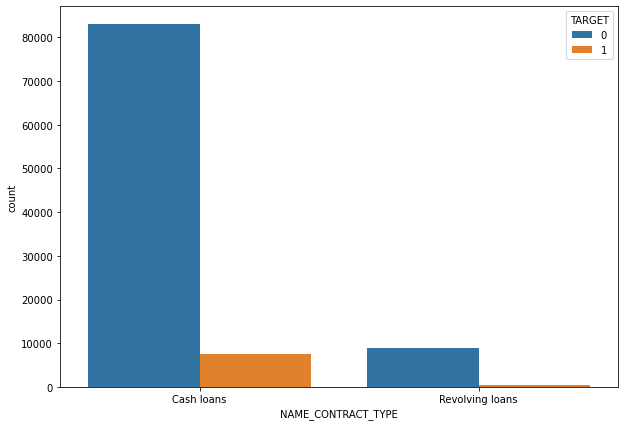

In [108]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = "TARGET", data = df)
plt.show()

# Reationship between Target and Income type

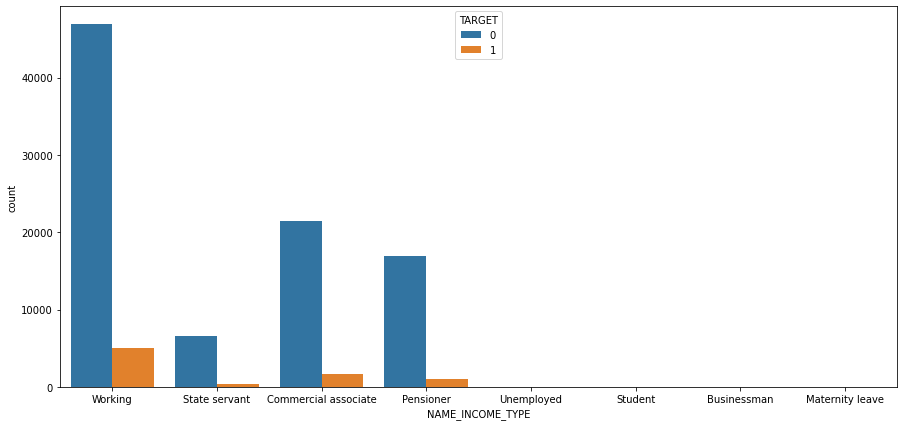

In [109]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(x = "NAME_INCOME_TYPE", hue = "TARGET", data = df)
plt.show()

# Relationship between Target and Education Type

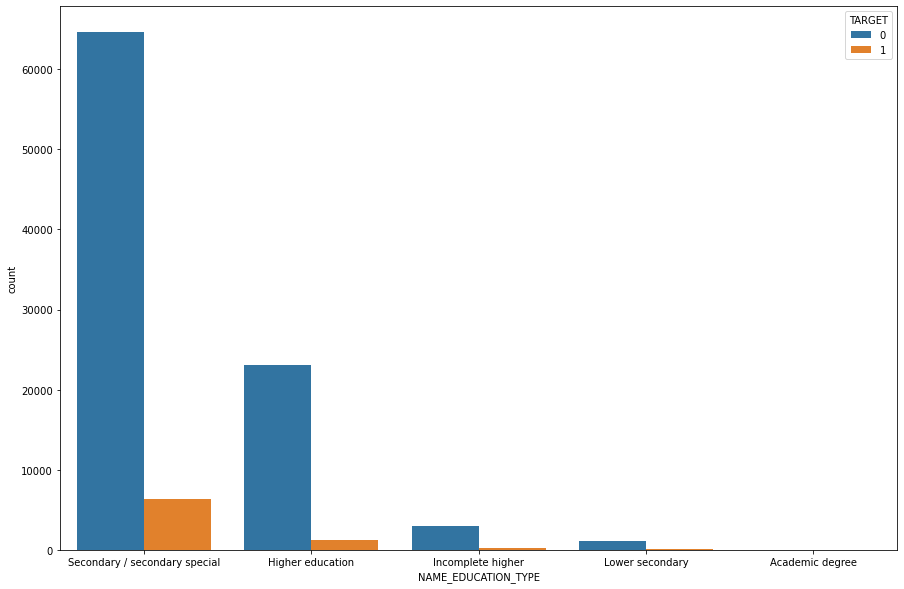

In [110]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.countplot(x = "NAME_EDUCATION_TYPE", hue = "TARGET", data = df)
plt.show()

# Relationship between Target and Occupation Type

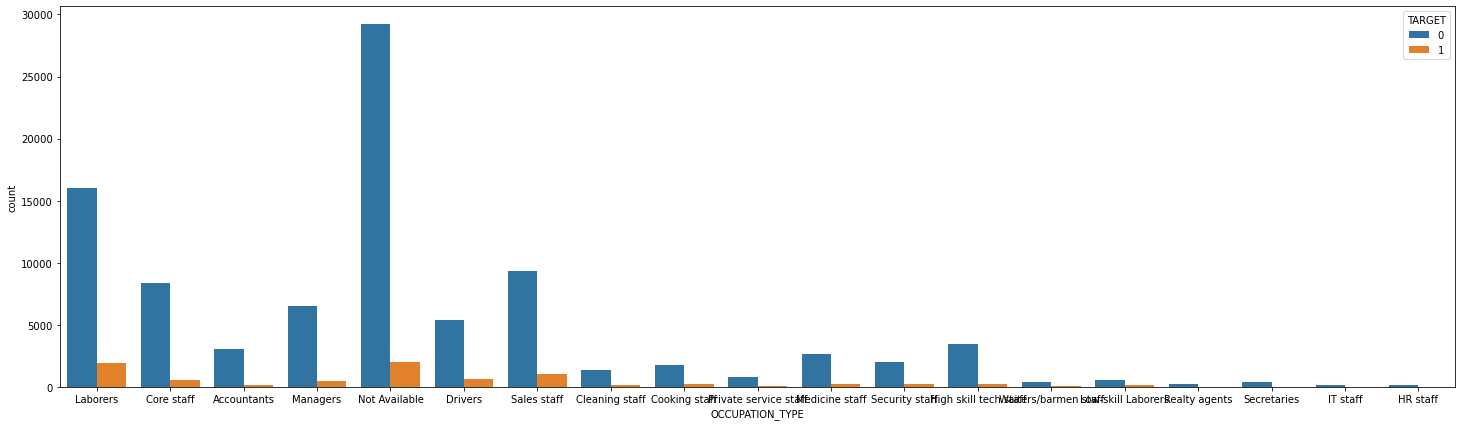

In [111]:
fig, ax = plt.subplots(figsize = (25, 7))
sns.countplot(x = "OCCUPATION_TYPE", hue = "TARGET", data = df)
plt.show()

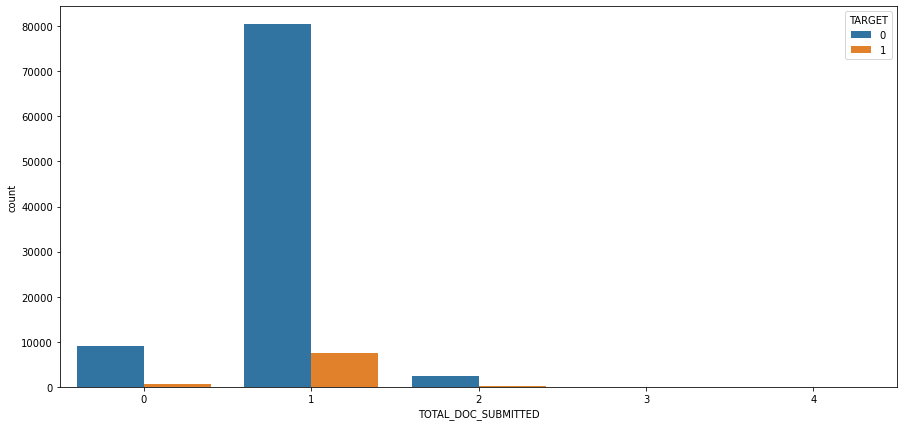

In [112]:
# Relationship between Target and Documents Submitted
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(x = "TOTAL_DOC_SUBMITTED", hue = "TARGET", data = df)
plt.show()

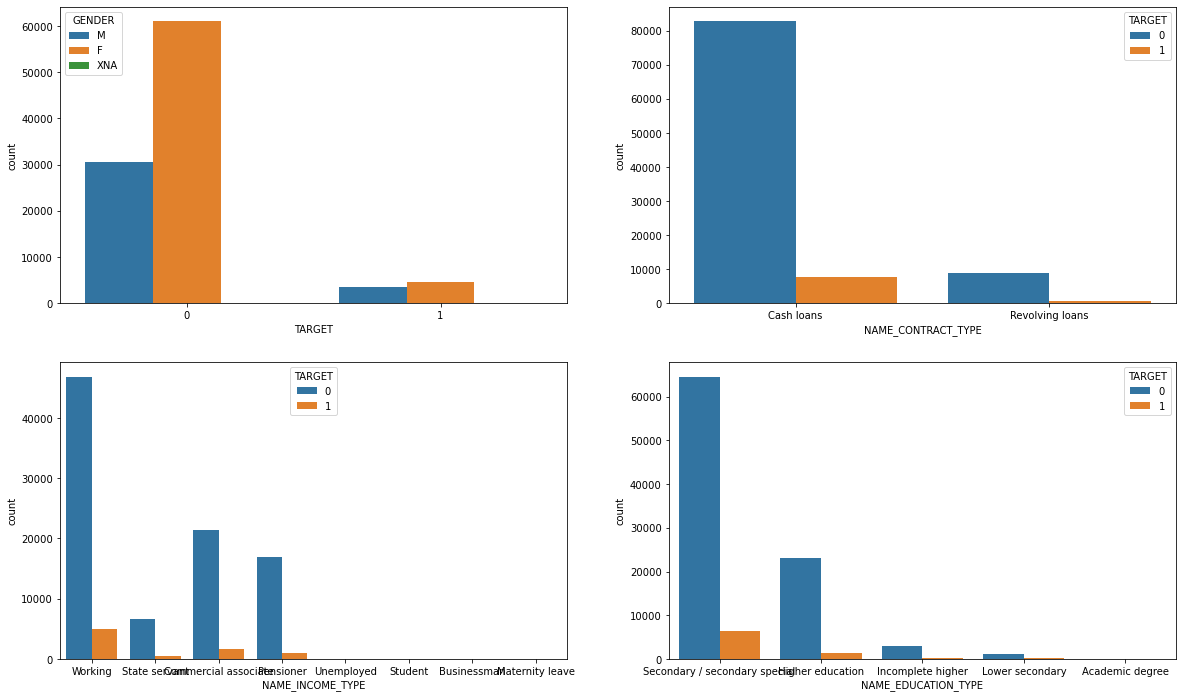

In [59]:
fig, ax = plt.subplots(2,2, figsize =(20,12))
sns.countplot(x = "TARGET", hue = "GENDER", data = df, ax=ax[0,0])
sns.countplot(x = "NAME_CONTRACT_TYPE", hue = "TARGET", data = df, ax=ax[0,1] )
sns.countplot(x = "NAME_INCOME_TYPE", hue = "TARGET", data = df, ax=ax[1,0])
sns.countplot(x = "NAME_EDUCATION_TYPE", hue = "TARGET", data = df, ax=ax[1,1])
plt.savefig("MyDashboard.jpg")
plt.show()
plt.close()




# CAT-NUM ANALYSIS (relationship between categorical and numerical data) 

 # Relationship between Target and Total Amount

In [113]:
df11=df[["TARGET","AMT_INCOME_TOTAL"]]
df11.corr()

,TARGET,AMT_INCOME_TOTAL
TARGET,1.000000,0.004166
AMT_INCOME_TOTAL,0.004166,1.000000


<AxesSubplot:>

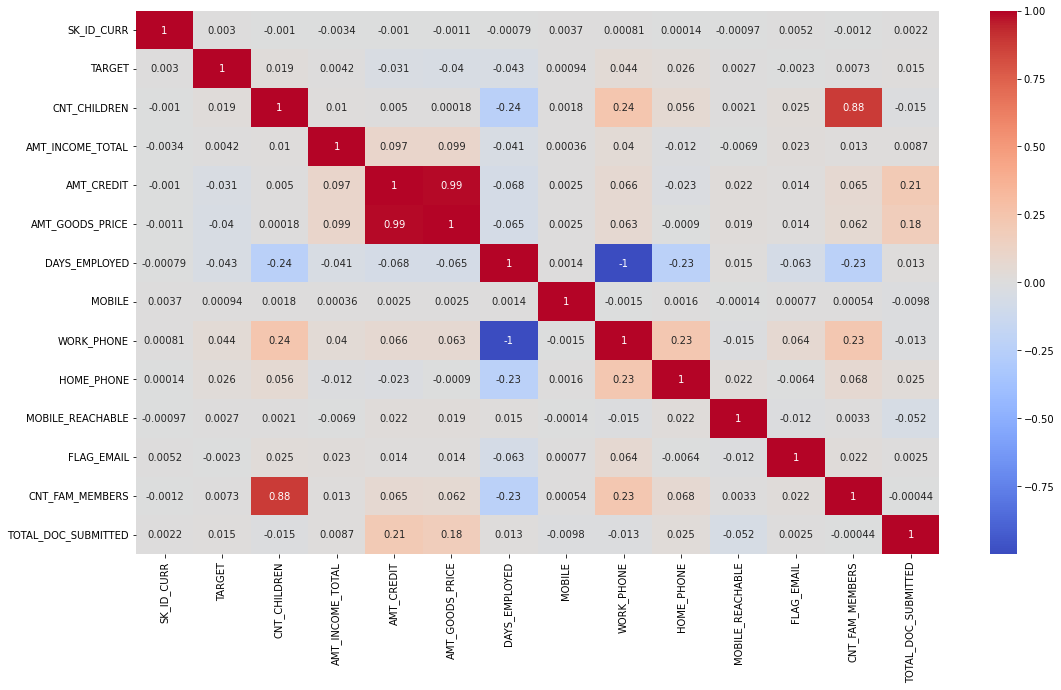

In [115]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")

# There is not a established relationship between Target and Total Amount

 # Relationship between Target and Credit Amount


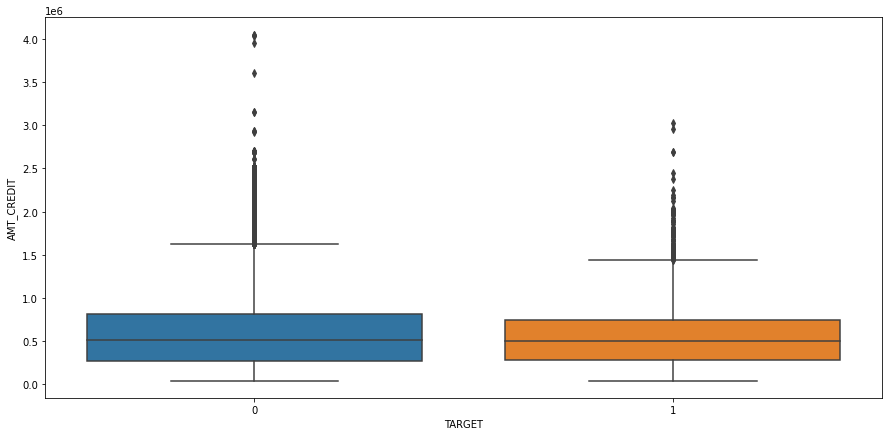

In [116]:
fig, ax = plt.subplots(1,  figsize = (15, 7))
#sns.histplot(x = df["AMT_CREDIT"], hue = df["TARGET"], ax = ax[0])
sns.boxplot(y = df["AMT_CREDIT"], x = df["TARGET"])
plt.show()

 # Relationship between Target and Goods Price

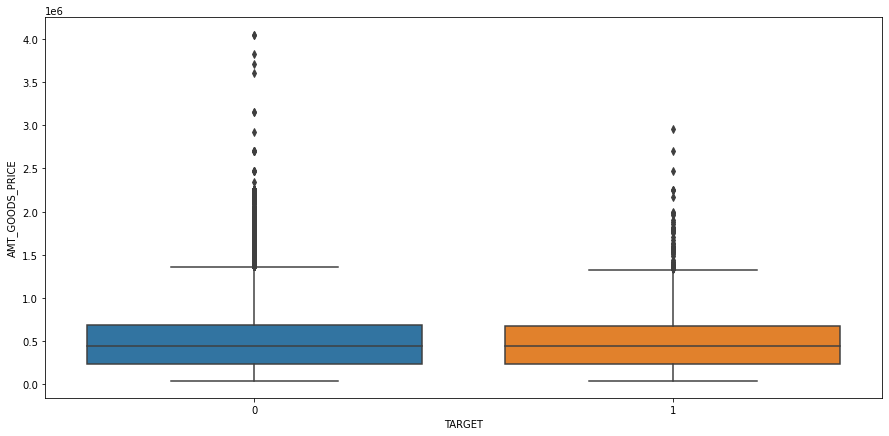

In [117]:
fig, ax = plt.subplots(1,  figsize = (15, 7))
#sns.histplot(x = df["AMT_GOODS_PRICE"], hue = df["TARGET"], ax = ax[0])
sns.boxplot(y = df["AMT_GOODS_PRICE"], x = df["TARGET"])
plt.show()

# Further Analysis (Level 3):
Multivariate 

# Relationship of defaulters wrt Income type 

In [118]:
def defaulter_perc(df,col):
    new_df=pd.DataFrame(columns=['Value','Percentage of Defaulter'])
    for value in df[col].unique():
        def_cnt=df[(df[col]==value)&(df.TARGET==1)].shape[0]
        total_cnt=df[df[col]==value].shape[0]
        new_df = new_df.append({'Value':value,'Percentage of Defaulter':(def_cnt*100/total_cnt)},ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending= False)

In [119]:
defaulter_perc(df,'NAME_INCOME_TYPE')

,Value,Percentage of Defaulter
4,Unemployed,40.000000
0,Working,9.587456
2,Commercial associate,7.434704
1,State servant,5.819274
3,Pensioner,5.478992
5,Student,0.000000
6,Businessman,0.000000
7,Maternity leave,0.000000


# Relationship of defaulters wrt Education type 

In [120]:
defaulter_perc(df,'NAME_EDUCATION_TYPE')

,Value,Percentage of Defaulter
3,Lower secondary,11.551155
0,Secondary / secondary special,8.981707
2,Incomplete higher,8.198226
1,Higher education,5.320371
4,Academic degree,4.081633


# Relationship of defaulters wrt OCCUPATION TYPE 

In [121]:
defaulter_perc(df,'OCCUPATION_TYPE')


,Value,Percentage of Defaulter
14,Low-skill Laborers,16.737589
5,Drivers,10.986288
13,Waiters/barmen staff,10.779817
0,Laborers,10.663177
8,Cooking staff,10.035842
11,Security staff,10.009099
6,Sales staff,9.811103
7,Cleaning staff,9.325397
15,Realty agents,8.677686
18,HR staff,8.287293


# Relationship of defaulters wrt Client Children

In [122]:
defaulter_perc(df,'CNT_CHILDREN')


,Value,Percentage of Defaulter
9,9.0,100.000000
10,11.0,100.000000
7,6.0,22.222222
4,4.0,14.864865
6,5.0,9.677419
3,3.0,9.142857
1,1.0,9.057283
2,2.0,8.495513
0,0.0,7.728176
5,7.0,0.000000


# Relationship between Total Income and Goods Price amount wrt Target

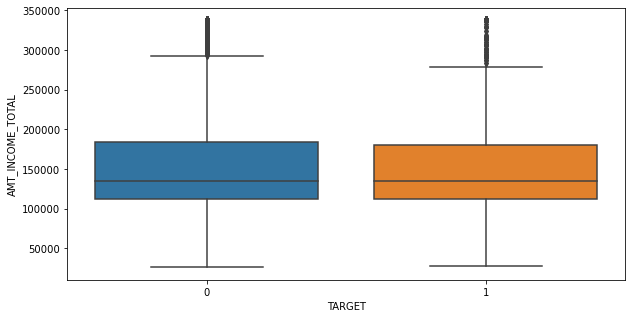

In [123]:

fig, ax = plt.subplots(1, figsize = (10, 5))
sns.boxplot(y=df_new["AMT_INCOME_TOTAL"], x=df_new["TARGET"])
plt.show()

# Analysis of the Total Income of Low Skilled labourers

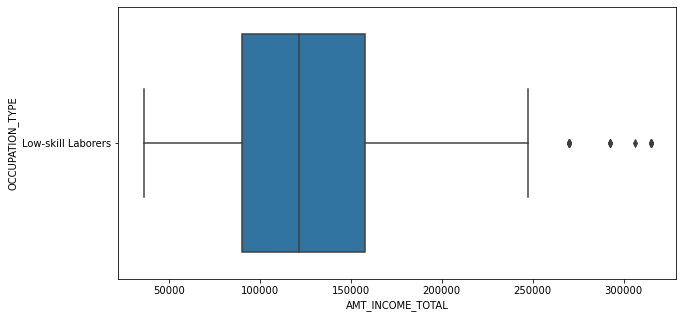

In [124]:

df9 = df_new[(df_new["OCCUPATION_TYPE"] == "Low-skill Laborers")]
fig, ax = plt.subplots(1, figsize = (10, 5))
sns.boxplot(y = df9["OCCUPATION_TYPE"] ,x = df9["AMT_INCOME_TOTAL"] )
plt.show()

# Analysis of the Total Income wrt Occupation type

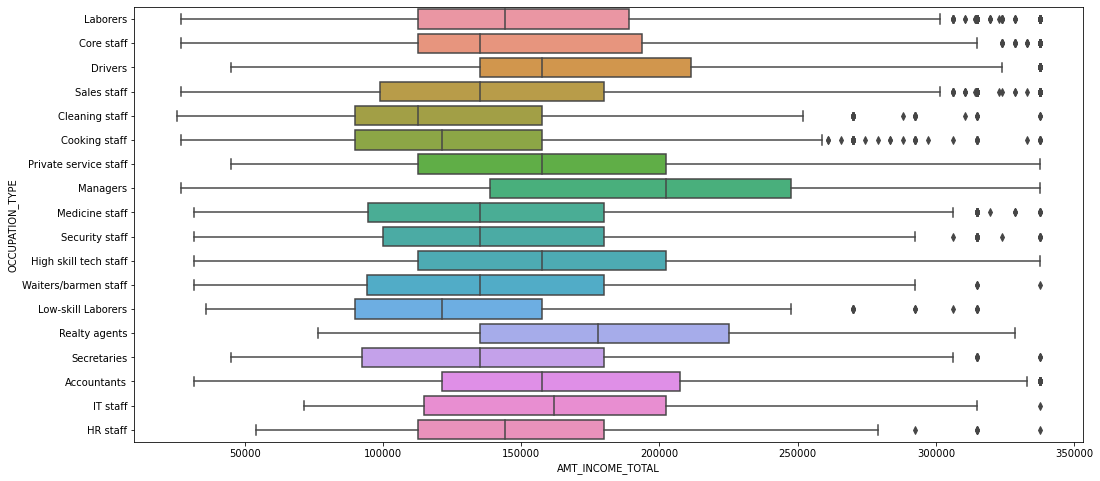

In [125]:

fig, ax = plt.subplots(1, figsize = (17, 8))
sns.boxplot(y = df_new["OCCUPATION_TYPE"] ,x = df_new["AMT_INCOME_TOTAL"] )
plt.show()

# Relationship of defaulters wrt Contract type

In [126]:
defaulter_perc(df_new,'NAME_CONTRACT_TYPE')

,Value,Percentage of Defaulter
0,Cash loans,8.603747
1,Revolving loans,5.776009


In [127]:
defaulter_perc(df_new,'NAME_EDUCATION_TYPE')

,Value,Percentage of Defaulter
3,Lower secondary,11.611785
0,Secondary / secondary special,9.125452
2,Incomplete higher,8.378747
1,Higher education,5.526290
4,Academic degree,2.702703


In [128]:
defaulter_perc(df_new,'TOTAL_DOC_SUBMITTED')

,Value,Percentage of Defaulter
4,4.0,100.000000
3,3.0,10.810811
0,1.0,8.688106
1,0.0,5.764639
2,2.0,5.147808


# Filtering of data for Clients who can be approved for loans.

In [129]:
df10 = df[(df["NAME_INCOME_TYPE"] != "Unemployed")]
df11 = df10[(df10["CNT_CHILDREN"] <= 8)]
df12 = df11[(df11["OCCUPATION_TYPE"] != "Low-skill Laborers")&(df11["TARGET"] != 1)]
df22 = df12[(df12["OCCUPATION_TYPE"] != "Drivers")&(df12["TARGET"] != 1)]
df23 = df22[(df22["NAME_EDUCATION_TYPE"] != "Lower secondary")&(df22["TARGET"] != 1)]
df23.shape



(84875, 24)

In [130]:
df24 = df23[(df23["NAME_INCOME_TYPE"] != "Pensioner")&(df23["TARGET"] != 1)]
df24.shape

(68449, 24)

In [131]:
df29 = df24[(df24["Car"] == "Y")|(df24["House"] == "Y")]
df29.shape

(54091, 24)

In [132]:
df30 = df29[(df29["MOBILE_REACHABLE"] == 1)]
df30.shape

(53961, 24)

In [133]:
pass1 = df[(df["OCCUPATION_TYPE"] == "Low-skill Laborers")]
pass2 = df[(df["OCCUPATION_TYPE"] == "Drivers")]
mean5 = pass1["AMT_INCOME_TOTAL"].mean()
mean6 = pass2["AMT_INCOME_TOTAL"].mean()
print(f"Mean Income of low skilled labourers {round(mean5, 3)}")
print(f"Mean Income of Drivers {round(mean6,3)}")

Mean Income of low skilled labourers 130642.679
Mean Income of Drivers 186679.893


In [134]:
df32 = df30[(df30["NAME_CONTRACT_TYPE"] == "Cash loans")&(df30["TARGET"] != 1)]
df32.shape


(47765, 24)

In [135]:
df33 = df32[(df32["AMT_INCOME_TOTAL"] > 50000)]
df33.shape

(47421, 24)

# Exporting data

In [136]:
# df33.to_excel("approved_clients_loan.xlsx")